# <font color = #FFA500> Google Play Store Apps
    
## Практическая работа 2

### Выполнила Савосько Анастасия, студентка 2-го курса МЦТиМК НИУ ВШЭ группы ММР-211
   
*Ссылка на датасет (Kaggle) - URL: https://www.kaggle.com/datasets/lava18/google-play-store-apps*

###  Краткое описание датасета
**Приложения из магазина Google Play.** В датасете представлены данных 10 000 приложений Play Store для анализа рынка Android. Датасет состоит из 13 переменных, среди них есть как текстовые (название приложения и категория), так и количественные переменные (примеры: цена, количество загрузок и др.). Подробное описание переменных датасета представлено ниже.

### Описание переменных датасета:

• **App** - Имя приложения <br>
• **Category** - Категория, к которой относится приложение <br>
• **Rating** - Общий пользовательский рейтинг приложения <br>
• **Reviews** - Количество отзывов пользователей о приложении <br>
• **Size** - Размер приложения <br>
• **Installs** - Количество загрузок/установок приложения пользователями <br>
• **Type** - Платный или бесплатный <br>
• **Price** - Цена приложения <br>
• **Content Rating** - Возрастная группа, на которую ориентировано приложение - Дети / Взрослые 21+ / Взрослые <br>
• **Genres** - Приложение может принадлежать к нескольким жанрам (помимо основной категории) <br>
• **Last Updated** - Дата последнего обновления<br>
• **Current Ver** - Текущая версия<br>
• **Android Ver** - Версия для Android <br>

**Заметка:** Переменных не много (13) факторный анализ не нужен, т.к. он строиться от 20.

### Гипотезы: ###
1. Возрастные ограничения влияют на рейтинг приложения.
2. Пользователи предпочитают платить за "легкие" приложения. 
3. Большинство приложений с самым высоким рейтингом имеют оптимальный размер до 50 МБ.
4. Оптимальная цена большинства приложений с самым высоким рейтингом составлит до 35 долларов.
5. Медицинские и семейные приложения будут самыми дорогими.
6. Пользователи загружают приложение чаще, если оно было проверено большим количеством людей. 
7. Бесплатных приложений больше чем платных.
8. Средние рейтинги приложений по категориям не отличаются друг от друга.
9. Самыми важными переменными для Random Forest будут Reviews и Size.

---

### <font color = #FFA500> Часть 1. Импорт и знакомство с данными

Начнем с того, что загрузим датасет через **pandas** и попробуем вывести верхние 5 строчек наблюдений через **head( )**.

In [1]:
import pandas as pd
# Pandas — это библиотека Python для обработки и анализа структурированных данных, её название происходит от «panel data» («панельные данные»). Панельными данными называют информацию, полученную в результате исследований и структурированную в виде таблиц. Для работы с такими массивами данных и создан Pandas.
import glob
# Модуль glob находит все пути, совпадающие с заданным шаблоном в соответствии с правилами, используемыми оболочкой Unix. Обрабатываются символы "*" (произвольное количество символов), "?" (один символ), и диапазоны символов с помощью [].
import os
# Модуль os предоставляет множество функций для работы с операционной системой, причём их поведение, как правило, не зависит от ОС, поэтому программы остаются переносимыми.
import numpy as np
# NumPy — это библиотека языка Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.
import matplotlib.pyplot as plt
# Matplotlib — это библиотека на языке Python для визуализации данных. В ней можно построить двумерные (плоские) и трехмерные графики.
%matplotlib inline 
# Команда %matplotlib inline указывает, что график необходимо построить все в той же оболочке Jupyter, но теперь он выводится как обычная картинка. Данный способ удобен тем, что позволяет проводить очень много экспериментов в рамках одного окна (точнее web-страницы).
import seaborn as sns
# Seaborn – это библиотека для создания статистической инфографики на Python. Он построен поверх matplotlib, а также поддерживает структуры данных numpy и pandas.
import holoviews
from IPython.display import display

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import scipy.stats as stats

In [2]:
GOOGLE=pd.read_csv('C:/Users/Savosko.viktoriya/DS/googleplaystore.csv')

In [3]:
GOOGLE.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Изучим, какие переменные есть в датасете через **info( )**, и определим размер датасета через **shape**

In [4]:
GOOGLE.shape

(10841, 13)

In [5]:
GOOGLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Вывод**: В оригинальном датасете 10841 строчек (наблюдений) и 13 столбцов (переменных). Очень мало переменных типа float64.

---

### <font color = #FFA500> Часть 2. Проверяем датасет на наличие пропущенных значений

Проверим датасет *GOOGLE* на наличие пропущенных значений через **isna( )**

In [6]:
GOOGLE.isna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
GOOGLE.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Вывод**: В датасете *GOOGLE* обнаружены пропущенные значения, значит, необходимы дополнительные действия с данными в будущем. 

---

### <font color = #FFA500> Часть 3. Работа с данными: очистка данных. Создание новыех переменных. Базовая визуализация

In [8]:
GOOGLE.drop_duplicates(subset='App', inplace=True)
GOOGLE = GOOGLE[GOOGLE['Android Ver'] != np.nan]
GOOGLE = GOOGLE[GOOGLE['Android Ver'] != 'NaN']
GOOGLE = GOOGLE[GOOGLE['Installs'] != 'Free']
GOOGLE = GOOGLE[GOOGLE['Installs'] != 'Paid']

In [9]:
print('Количество приложений в наборе данных : ' , len(GOOGLE))
GOOGLE.sample(5)

Количество приложений в наборе данных :  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1671,Kick the Buddy,GAME,4.3,1000417,Varies with device,"50,000,000+",Free,0,Teen,Action,"July 5, 2018",Varies with device,4.4 and up
3135,VZ Navigator for Tablets,TRAVEL_AND_LOCAL,3.6,285,39M,"500,000+",Free,0,Everyone,Travel & Local,"January 22, 2018",10.7.8.111,4.2 and up
9683,Masha and The Bear Puzzle Game,FAMILY,4.3,13330,73M,"1,000,000+",Free,0,Everyone,Puzzle;Brain Games,"May 24, 2018",2.0,4.1 and up
9367,Me-eh,FAMILY,NaN,13,62M,100+,Free,0,Everyone,Puzzle,"April 6, 2018",3.33,4.1 and up
4461,Volume Slider Like Android P Volume Control,TOOLS,4.1,1129,1.7M,"10,000+",Paid,$0.99,Everyone,Tools,"June 30, 2018",1.28,4.1 and up


**Задача 3.1.** Удалить «+» и «,» из «Installs», чтобы сделать его числовым

In [10]:
GOOGLE['Installs'] = GOOGLE['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
GOOGLE['Installs'] = GOOGLE['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
GOOGLE['Installs'] = GOOGLE['Installs'].apply(lambda x: int(x))

GOOGLE['Installs'] = GOOGLE['Installs'].apply(lambda x: float(x))

**Задача 3.2.** Преобразовать все размеры приложений «Size» в МБ

In [11]:
# Удаляю «M», заменяю «k» и делю на 10^-3
GOOGLE['Size'] = GOOGLE['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

GOOGLE['Size'] = GOOGLE['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
GOOGLE['Size'] = GOOGLE['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
GOOGLE['Size'] = GOOGLE['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

GOOGLE['Size'] = GOOGLE['Size'].apply(lambda x: float(x))

**Задача 3.3.** Удалить «$» из «Price» чтобы сделать его числовым

In [12]:
GOOGLE['Price'] = GOOGLE['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
GOOGLE['Price'] = GOOGLE['Price'].apply(lambda x: float(x))

GOOGLE['Reviews'] = GOOGLE['Reviews'].apply(lambda x: int(x))

In [13]:
GOOGLE.head() # Посмотрим, что изменилось

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
GOOGLE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


In [15]:
GOOGLE.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,20.395289,7.777507e+06,1.099299
std,0.536625,1.831320e+06,21.827542,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


**Вывод**: Теперь в датасете *GOOGLE* больше переменных типа float64. С этим уже можно работать можно.

**Задача 3.4.** Как распределены значения по размеру в DataFrame?

<AxesSubplot:>

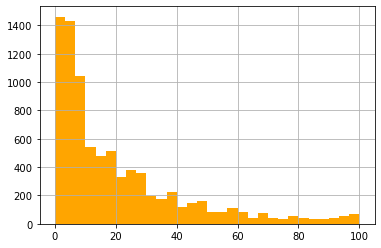

In [16]:
GOOGLE['Size'].hist(bins=30, color = '#FFA500')

**Микровыводы по задаче 3.4.:** Используем 'hist( )' для построения гистограммы по количественной переменной 'Size'. Можно заметить, как много в приложений, которые не требуют много памяти.

**Задача 3.5.** Приложения какого типа ('Type') встречаются в DataFrame чаще всего?

In [17]:
GOOGLE['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

<AxesSubplot:title={'center':'Число приложений в DataFrame по типам'}>

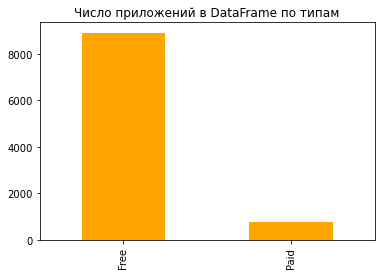

In [18]:
GOOGLE['Type'].value_counts().plot(kind='bar', color = '#FFA500', \
                            title = 'Число приложений в DataFrame по типам')

**Микровыводы по задаче 3.5.:** Бесплатных приложений значительно больше чем платных

---

### <font color = #FFA500> Часть 4. Поиск любых очевидных закономерностей (EDA)

**EDA, Exploratory Data Analysis** или разведочный анализ данных — один из важнейших этапов проекта в области науки о данных. Он не только помогает определить направление проекта, но также помогает использовать набор данных наилучшим образом.

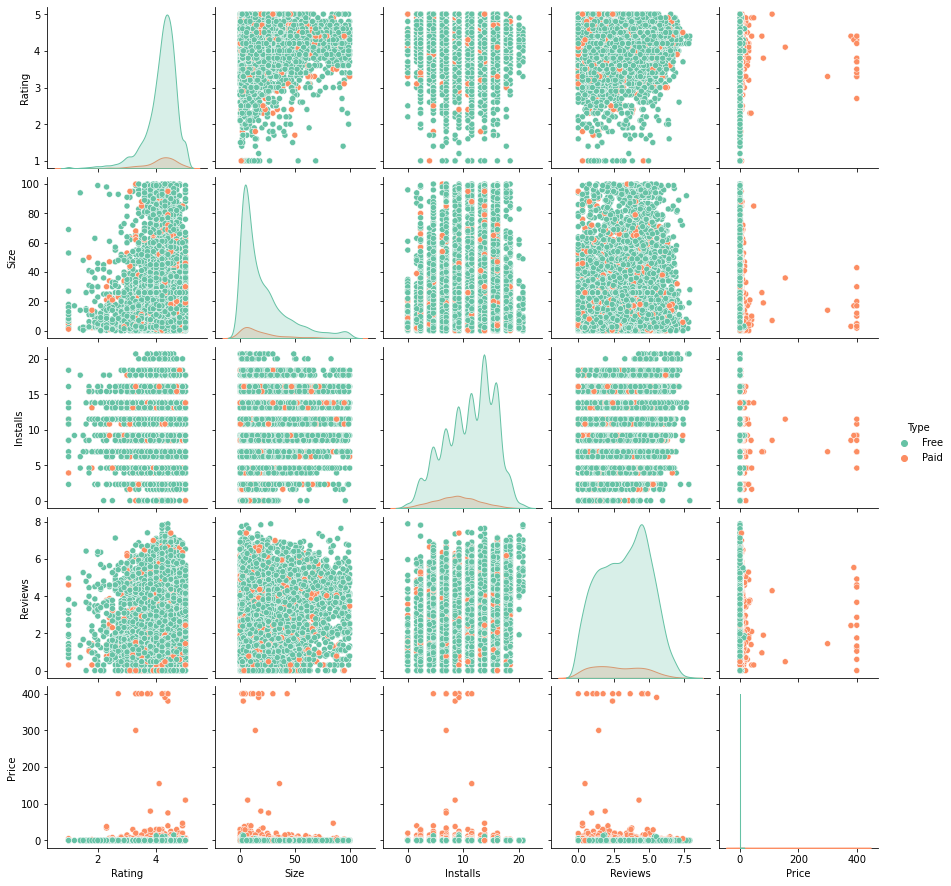

In [19]:
# Избавляемся от пропущенных значений через "dropna()"
x = GOOGLE['Rating'].dropna()
y = GOOGLE['Size'].dropna()
z = GOOGLE['Installs'][GOOGLE.Installs!=0].dropna()
p = GOOGLE['Reviews'][GOOGLE.Reviews!=0].dropna()
t = GOOGLE['Type'].dropna()
price = GOOGLE['Price']

# Для построения линейной регрессии необходимо проверить dataset на наличие линейной взаимосвязи (т.е. мы хотим понять имеет ли вообще смысл строить её для наших данных)

# График пар — это матрица диаграмм рассеяния , которая позволяет понять попарные отношения между различными переменными в наборе данных.
# Самый простой способ создать парный график в Python — использоватьфункцию seaborn.pairplot(df).
p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")
# Используем "hue", благодаря которому мы можем создать парный график, который окрашивает каждую точку на каждом графике на основе некоторой категориальной переменной

**Вывод:** Линейных взаимосвязей выявлено не было. 

### <font color = #FFA500> Часть 5. Продвинутая визуализация. Группировка. Выбросы.

**Задача 5.1.** Приложения с каким рейтингом скачивают чаще всего?

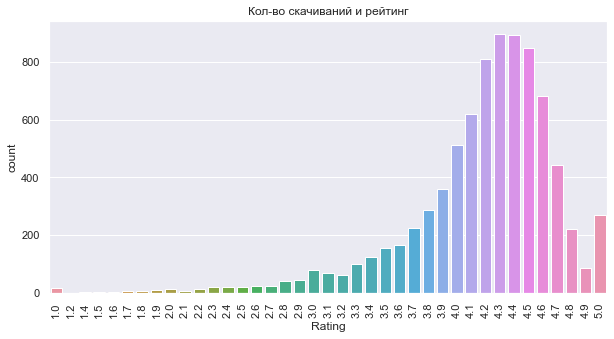

In [20]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Кол-во скачиваний и рейтинг")
ax = sns.countplot(x="Rating", data=GOOGLE)

**Микровывод по задаче 5.1.:** Чаще всего скачивают приложения с рейтингом 4.3.

**Задача 5.2.** Приложения какой категории скачивают чаще всего?

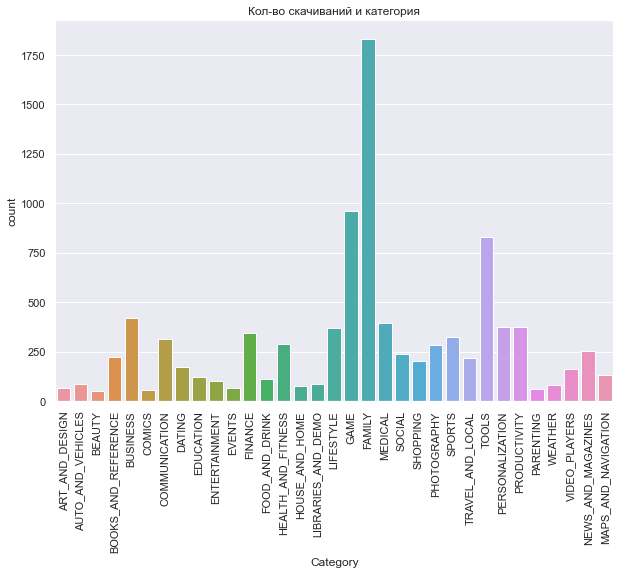

In [21]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Кол-во скачиваний и категория")
ax = sns.countplot(x="Category", data=GOOGLE)

**Микровывод по задаче 5.2.:** Чаще всего скачивают приложения в категории FAMILY.

**Задача 5.3.** Приложения какой категории скачивают чаще всего? Показать в процентах, в качестве визуализации использовать Plotly. 

In [22]:
apps_in_category = GOOGLE['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(labels = apps_in_category.index, values = apps_in_category.values, hoverinfo = 'label+value')]

#Plotly — библиотека для визуализации данных (позволяет строить интерактивные визуализации)
# Похожие на plotly - это bokeh и pygal 
plotly.offline.iplot(data, filename='active_category')

**Микровыводы по задаче 5.3.:** <br>
1. Приложения категорий «Family» и «Game» имеют наибольшую популярность на рынке. 
2. Приложения категории «Tools», «Business» и «Medical» имеют долю в 8.56%, 4.35% и 4.09% соответственно.

**Задача 5.4.** Какой рейтинг приложения по категориям? Есть ли у нас категории, которые работают исключительно хорошо или плохо? 

F_onewayResult(statistic=12.792637156180543, pvalue=2.323280446259348e-20)


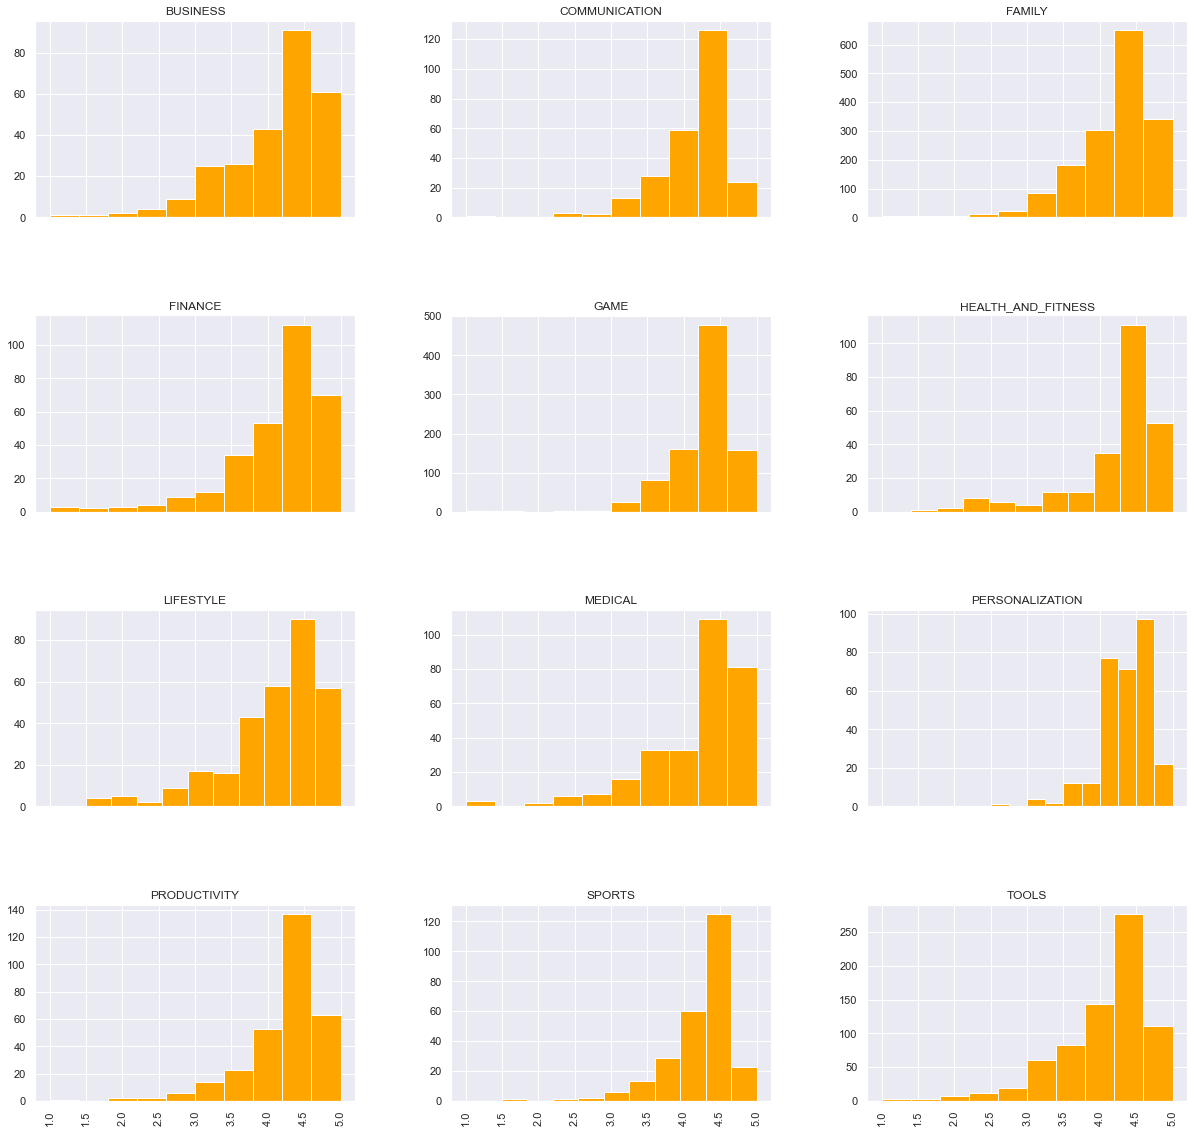

In [23]:
# Избавляемся от пропущенных значений через "dropna()"
# Название категорий смотрим из задачи 5.2.

GAPP = stats.f_oneway(GOOGLE.loc[GOOGLE.Category == 'BUSINESS']['Rating'].dropna(),
               GOOGLE.loc[GOOGLE.Category == 'EDUCATION']['Rating'].dropna(),
               GOOGLE.loc[GOOGLE.Category == 'FAMILY']['Rating'].dropna(),
               GOOGLE.loc[GOOGLE.Category == 'FINANCE']['Rating'].dropna(),
               GOOGLE.loc[GOOGLE.Category == 'GAME']['Rating'].dropna(),
               GOOGLE.loc[GOOGLE.Category == 'LIFESTYLE']['Rating'].dropna(),
               GOOGLE.loc[GOOGLE.Category == 'MEDICAL']['Rating'].dropna(),
               GOOGLE.loc[GOOGLE.Category == 'PERSONALIZATION']['Rating'].dropna(),
               GOOGLE.loc[GOOGLE.Category == 'PRODUCTIVITY']['Rating'].dropna(),
               GOOGLE.loc[GOOGLE.Category == 'TOOLS']['Rating'].dropna())

print(GAPP)

groups = GOOGLE.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20), color='#FFA500')

**Микровывод по задаче 5.4.:** Значение p-value чрезвычайно мало, поэтому мы отклоняем нулевую гипотезу в пользу альтернативной гипотезы. Средние рейтинги приложений по категориям сильно отличаются друг от друга.

**Задача 5.5.** Давайте проверим,как размер приложения влияет на его рейтинг.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



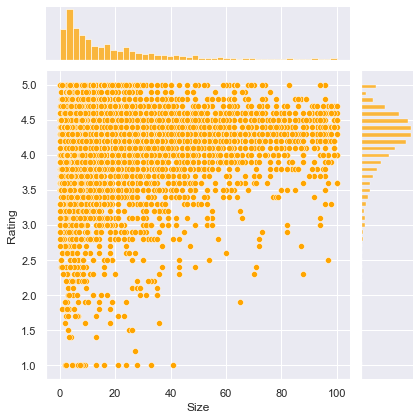

In [24]:
groups = GOOGLE.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

sns.set_style("darkgrid")
ax = sns.jointplot(GOOGLE['Size'], GOOGLE['Rating'], color='#FFA500')

**Микровывод по задаче 5.5.:** Большинство приложений с самым высоким рейтингом имеют размер от ~ 1 МБ до ~ 40 МБ — они не слишком легкие и не слишком тяжелые.

**Задача 5.6.** Давайте проверим, как цена приложения влияет на его рейтинг

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



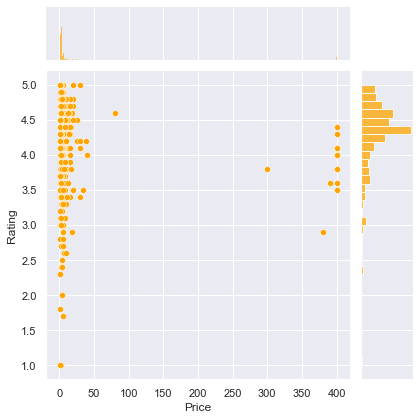

In [25]:
paid_apps = GOOGLE[GOOGLE.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps, color='#FFA500')

**Микровывод по задаче 5.6.:** Оптимальная цена большинства приложений с самым высоким рейтингом составляет ~ 1 до 30 долларов. 

**Задача 5.7.** Платные приложения загружаются так же часто, как и бесплатные?

In [26]:
# Первый корневой атрибут data имеет значением список словарей. Эти словари называются traces.
trace0 = go.Box(y=np.log10(GOOGLE['Installs'][GOOGLE.Type=='Paid']), name = 'Платные', marker = dict(color='#FFA500',))
trace1 = go.Box(y=np.log10(GOOGLE['Installs'][GOOGLE.Type=='Free']), name = 'Бесплатные', marker = dict(color = 'green',))

# Второй корневой атрибут layout имеет значением словарь.Отвечает за визуализацию (заголовок, размер и т.д.) 
# Данный атрибут ответственен за расположение и настройки не связанных с данными частей фигуры.
layout = go.Layout(title = "Количество загрузок платных приложений и бесплатных приложений", yaxis= {'title': 'Количество загрузок (в логарифмическом масштабе)'})

data = [trace0, trace1]

plotly.offline.iplot({'data': data, 'layout': layout})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



**Микровывод по задаче 5.7.:** Платные приложения имеют относительно меньшее количество загрузок, чем бесплатные. Но в этом нет ничего удивительного, т.к. решиться на покупку IT-продукта всегда сложно.

**Задача 5.8.** Как возрастный ограничения влияют на рейтинг (плотность рейтинга, дисперсия, выбросы)? Показать визуально.

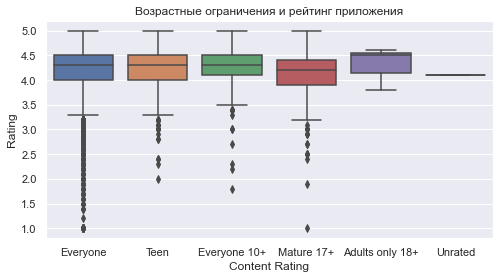

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
ax=sns.boxplot(x='Content Rating', y='Rating', data=GOOGLE)
ax.set_title('Возрастные ограничения и рейтинг приложения')
plt.show()

**Микровывод по задаче 5.8.:** Приложения «Только для взрослых 18+» имеют более плотный рейтинг около 4-4,5, тогда как другие приложения имеют более высокую дисперсию, выбросы и имеют по крайней мере несколько приложений с рейтингом = 5.

---

### <font color = #FFA500> Часть 6. Фильтрация и сотрировка


**Задача 6.1.** Определить цены приложений в зависомости от категории?

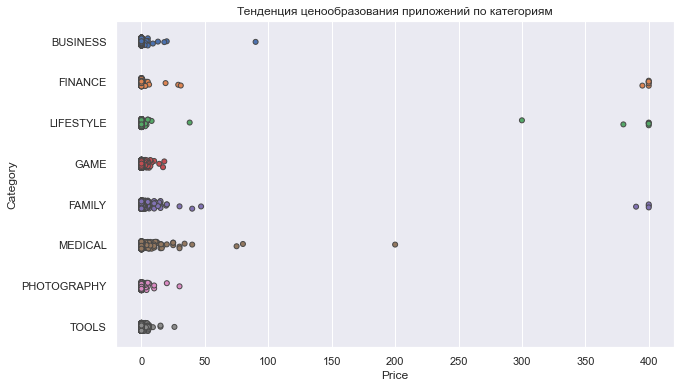

In [28]:
p_GOOGLE = GOOGLE[GOOGLE.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
p = sns.stripplot(x="Price", y="Category", data=p_GOOGLE, jitter=True, linewidth=1)
title = ax.set_title('Тенденция ценообразования приложений по категориям')

**Задача 6.2.** Давайте взглянем на приложения стоимостью выше 350$?

In [29]:
GOOGLE[['Category','Price', 'App']][GOOGLE.Price > 350] 
# Нам все данные про приложение не нужны, поэтомы выводим только категорию и название, фильтруем по цене.

,Category,Price,App
4197,FAMILY,399.99,most expensive app (H)
4362,LIFESTYLE,399.99,💎 I'm rich
4367,LIFESTYLE,400.00,I'm Rich - Trump Edition
5351,LIFESTYLE,399.99,I am rich
5354,FAMILY,399.99,I am Rich Plus
5356,FINANCE,399.99,I Am Rich Premium
5357,LIFESTYLE,379.99,I am extremely Rich
5358,FINANCE,399.99,I am Rich!
5359,FINANCE,399.99,I am rich(premium)
5362,FAMILY,399.99,I Am Rich Pro


**Задача 6.3.** Давайте взглянем на приложения стоимостью 50 - 100$?

In [30]:
GOOGLE[['Category','Price', 'App']][(GOOGLE.Price > 50) & (GOOGLE.Price < 100)] 

,Category,Price,App
2253,MEDICAL,79.99,Vargo Anesthesia Mega App
2390,MEDICAL,74.99,Language Therapy: Aphasia
9730,BUSINESS,89.99,Lean EQ


**Задача 6.4.** Какие приложения в категории "MEDICAL" являются бесплатными?

In [31]:
GOOGLE[['Category','Price', 'App']][(GOOGLE.Price == 0) & (GOOGLE.Category == "MEDICAL")] 
# Нам все данные про приложение не нужны, поэтомы выводим только категорию и название, фильтруем по цене.

,Category,Price,App
2303,MEDICAL,0.0,GoodRx Drug Prices and Coupons
2304,MEDICAL,0.0,MyChart
2305,MEDICAL,0.0,FollowMyHealth®
2306,MEDICAL,0.0,CareZone
2307,MEDICAL,0.0,Ovia Pregnancy Tracker & Baby Countdown Calendar
...,...,...,...
10410,MEDICAL,0.0,FH® Cost Lookup / FH® CCSalud
10523,MEDICAL,0.0,FK
10806,MEDICAL,0.0,SnakeBite911 FR
10824,MEDICAL,0.0,Cardio-FR


**Задача 6.5.** Как выглядел бы ТОП-5 приложений, если ранжирование происходило по рейтингу приложения?

В данном коде используем sort_values( ) и прописываем ascending=False, т.к. нас интересует сортировка по понижению 'Rating' (от max до min).

In [32]:
GOOGLE.sort_values(by=['Rating'], ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,14.0,1000.0,Free,0.00,Teen,Business,"August 5, 2018",1.1,4.2 and up
7164,CD CHOICE TUBE,FAMILY,5.0,10,5.8,500.0,Free,0.00,Everyone,Entertainment,"July 23, 2017",0.0.4,4.1 and up
7195,CE Smart,TOOLS,5.0,3,29.0,100.0,Free,0.00,Everyone,Tools,"May 28, 2018",2.2.0,4.1 and up
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27.0,100.0,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up
9341,EG India,LIFESTYLE,5.0,3,4.0,100.0,Free,0.00,Everyone,Lifestyle,"July 29, 2018",1.1.3,4.0.3 and up


**Задача 6.6.** Как выглядел бы ТОП-5 приложений, если ранжирование происходило одновременно по позиции "Price" и "Rating"?

В данном коде снова используем sort_values( ), но на этот раз прописываем ascending=[True, False], т.к. нас интересует сортировка по позиции 'Price' (от 1-ой до последней) и понижению 'Rating' (от max до min).

In [33]:
GOOGLE.sort_values(by=['Price', 'Rating'], ascending=[True, False]).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up


**Задача 6.7.** Определить цены приложений в зависомости от категории с учетом "нежелательных приложений"?

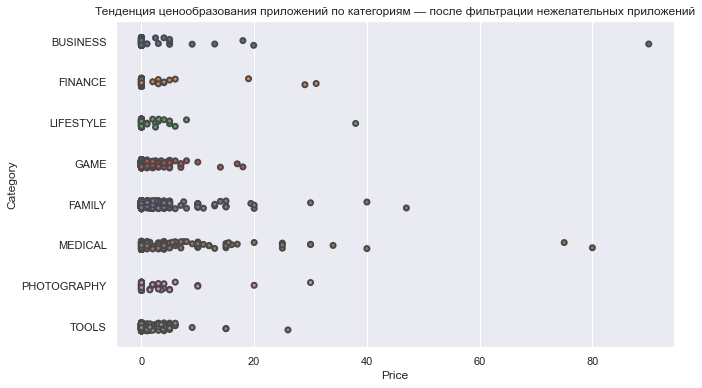

In [34]:
# Нежелательные приложения это приложения стоимость которых больше 100$
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
GOOGLE_price = p_GOOGLE[p_GOOGLE.Price<100]
p = sns.stripplot(x="Price", y="Category", data= GOOGLE_price, jitter=True, linewidth=2)
title = ax.set_title('Тенденция ценообразования приложений по категориям — после фильтрации нежелательных приложений')

**Микровыводы по задаче 6.7.:** <br>
1. Очевидно, что медицинские и семейные приложения являются самыми дорогими. Некоторые медицинские приложения могут стоить даже до 80 долларов. <br>
2. Все остальные приложения стоят менее 30 долларов. <br>
3. Удивительно, но все игровые приложения стоят менее 20 долларов. <br>

---

### <font color = #FFA500> Часть 7. Корреляция

**Задача 7.1.** Есть ли корреляция между общий пользовательским рейтингом приложения ('Rating') и количеством отзывов пользователей о приложении ('Reviews')? Постройте график рассеяния.

In [35]:
GOOGLE['Reviews'].corr(GOOGLE['Rating'])

0.05508086657980981

<AxesSubplot:title={'center':'График рассеивания по переменным Rating и Reviews'}, xlabel='Reviews', ylabel='Rating'>

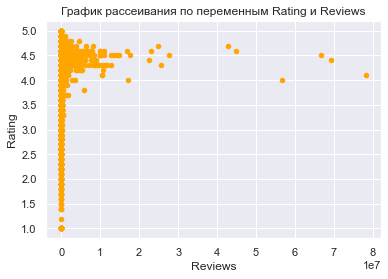

In [36]:
GOOGLE.plot('Reviews', 'Rating', kind='scatter', color='#FFA500', \
             title="График рассеивания по переменным Rating и Reviews")

**Микровывод по задаче 7.1.:** Для расчета корреляции используем corr( ). Получаем значение corr = 0.055, что свидетельствует о слабой зависимости между общий пользовательским рейтингом приложения ('Rating') и количеством отзывов пользователей о приложении ('Reviews').

**Задача 7.2.**  Построить тепловую карту для выявление зависимостей между другими пересенными.

Text(0.5, 1.0, 'Тепловая матрица корреляций')

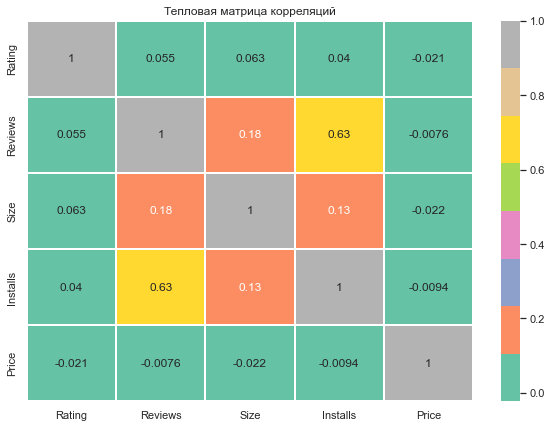

In [37]:
corrmat = GOOGLE.corr()
plt.figure(figsize = (10, 7))
p =sns.heatmap(corrmat, annot=True, linecolor='white', linewidth=2, cmap="Set2")
plt.title('Тепловая матрица корреляций')
# Проверим есть ли мультиколиниарность в данных (т.е. переменные между собой не корелировали). Это в дальнейшем пригодится для линейной регрессии, т.к. мы хотим, чтобы корреляция была в зависимой преременной, но при этом не было корреляции между зависимыми предикторами. 
# Для лин. регрессии условие выполняется, т.к. "сильная" зависимость есть только между 'Reviews' и 'Installs'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



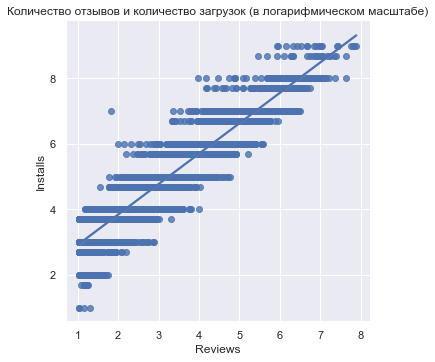

In [38]:
GOOGLE_copy = GOOGLE.copy()

GOOGLE_copy = GOOGLE_copy[GOOGLE_copy.Reviews > 10]
GOOGLE_copy = GOOGLE_copy[GOOGLE_copy.Installs > 0]

GOOGLE_copy['Installs'] = np.log10(GOOGLE['Installs'])
GOOGLE_copy['Reviews'] = np.log10(GOOGLE['Reviews'])

sns.lmplot("Reviews", "Installs", data=GOOGLE_copy)
ax = plt.gca()
_ = ax.set_title('Количество отзывов и количество загрузок (в логарифмическом масштабе)')

**Микровывод по задаче 7.2.:** Благодаря heatmap( ) строим тепловую карту корреляций для количественных переменных. Самой сильной зависимостью в матрице оказывается значение между переменной 'Reviews' и 'Installs' - коэффициент корреляции равен 0.63 (прямая зависимость). Можно сделать вывод, что чем больше отзывов у приложения, тем чаще его устанавливают, или, наоборот, чем меньше отзывов у приложения, тем реже его устанавливают.

---

### <font color = #FFA500> Часть 8. Выбросы и Z-оценка

**Задача 8.1.** Как поменяется среднее значение по количеству отзывов пользователей о приложении (переменная 'Reviews'), если учесть выбросы по интерквартильному размаху и стандартному отклонению?

In [39]:
print(GOOGLE['Reviews'].mean())

216592.56382648306


**Микровывод по задаче 8.1.:** Среднее значение по количество отзывов пользователей о приложении составляет 216592.56 

In [40]:
q3 = np.percentile(GOOGLE['Reviews'], 75)
q1 = np.percentile(GOOGLE['Reviews'], 25)
iqr = q3 - q1

In [41]:
iqr_bottom = q1 - 1.5*iqr
iqr_top = q3 + 1.5*iqr
print(iqr_bottom, iqr_top)

-44039.0 73465.0


In [42]:
GOOGLE[GOOGLE['Reviews'] > iqr_top].shape

(1656, 13)

In [43]:
iqr_no_outliers = GOOGLE[GOOGLE['Reviews'] <= iqr_top]

In [44]:
print(iqr_no_outliers['Reviews'].mean())

7280.614894414594


**Микровывод по задаче 8.1.:** Найдено 756 выбросов по интерквартильному размаху iqr, если их учесть, то среднее значение по количеству отзывов пользователей о приложении составит 7280.6.

In [45]:
mean = GOOGLE['Reviews'].mean()
std = GOOGLE['Reviews'].std()
std_bottom = mean - 3*std
std_top = mean + 3*std
print(std_bottom, std_top)

-5277366.134700307 5710551.262353272


In [46]:
GOOGLE[GOOGLE['Reviews'] > std_top].shape

(68, 13)

In [47]:
std_no_outliers = GOOGLE[GOOGLE['Reviews'] <= std_top]

In [48]:
print(std_no_outliers['Reviews'].mean())

113782.66510270046


**Микровывод по задаче 8.1.:** Найдено 68 выбросов по стандартному отклонению std (3 ст. откл.), если их учесть, то среднее значение по количеству отзывов пользователей о приложении составит 113782.6.

**Задача 8.2:** Сколько выбросов по числу недель пребывания треков в чарте Spotify в 2022 году (переменная 'weeks_on_chart'), если провести расчеты Z-оценок?

In [49]:
import scipy.stats

In [50]:
scipy.stats.zscore(GOOGLE['Reviews'])

0       -0.118191
1       -0.117749
2       -0.070490
3       -0.000518
4       -0.117749
           ...   
10836   -0.118257
10837   -0.118275
10838   -0.118276
10839   -0.118215
10840    0.099231
Name: Reviews, Length: 9659, dtype: float64

In [51]:
GOOGLE['z-score'] = scipy.stats.zscore(GOOGLE['Reviews'])

In [52]:
GOOGLE[GOOGLE['z-score'] > 3].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,z-score
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,30.813396
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,37.626579
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,5.147594
342,Viber Messenger,COMMUNICATION,4.3,11334799,NaN,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device,6.071459
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40.0,5.000000e+08,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up,9.554441


In [53]:
GOOGLE[GOOGLE['z-score'] > 3].shape

(68, 14)

**Микровывод по задаче 8.2.:** Импортируем scipy.stats, который поможет рассчитать Z-оценки по количеству отзывов пользователей о приложении. Обнаруживаем, что 68 приложений являются выбросами, т.к. они отличаются от среднего значения на более чем 3 стандартных отклонения. Например, среди них такие приложения как "Viber Messenger", "Google Chrome: Fast & Secure", "WhatsApp Messenger" и другие.

_________

### <font color = #FFA500> Часть 9. T-TEST. Линейная регрессия. Предсказания.

### <font color = #FFA500> T-TEST

**Задача 9.1:** Гипотеза: Не важно платное приложение или нет, количество установок одинаково.

In [54]:
GOOGLE_NEW = GOOGLE[['Type','Installs']].copy()

In [55]:
GOOGLE_NEW.head() # Выводим, чтобы посмотреть, что всё создали верно. 

,Type,Installs
0,Free,10000.0
1,Free,500000.0
2,Free,5000000.0
3,Free,50000000.0
4,Free,100000.0


In [56]:
GOOGLE_NEW["Type"].replace({"Free":0,"Paid":1}, inplace=True) # "Type" делаем бинарной переменной.

In [57]:
Free = GOOGLE_NEW[GOOGLE_NEW["Type"]==0]["Installs"]
Paid = GOOGLE_NEW[GOOGLE_NEW["Type"]==1]["Installs"]

In [58]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) < t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')
        
t_critical = 1.9667

In [59]:
Free.var()

3130234929427056.5

In [60]:
Paid.var() # Видим, что ответы получились очень разные, поэтому используем Уэлча

290504181639.67096

#### Поправка Уэлча
$
\begin{align}
df = \frac{(V_1 + V_2)^2}{\frac{V^2_1}{n_1 - 1} + \frac{V^2_2}{n_2 - 1}}
\end{align}
$

In [61]:
n_1 = len(Free)
n_2 = len(Paid)
print(n_1, n_2)

8902 756


In [62]:
mean_1 = Free.mean()
mean_2 = Paid.mean()
print(mean_1, mean_2)

8432439.075039318 75879.47222222222


In [63]:
var_1 = Free.var()
var_2 = Paid.var()
print(var_1, var_2)

3130234929427056.5 290504181639.67096


In [64]:
import scipy.stats
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1, 
                                 mean_2, np.sqrt(var_2), n_2, equal_var=False)

Ttest_indResult(statistic=14.084637508843803, pvalue=1.4150749111280453e-44)

In [65]:
p_value = scipy.stats.ttest_ind(Free, Paid, equal_var=False)[-1]

In [66]:
hypothesis_check(p_value, t_critical)

Отвергаем Н0. Разница между средними статистически значима.


**Микровывод по задаче 9.1.:** Мы отвергаем гипотезу, т.к., как и ожидалось, количество установок разное у приложений разного типа.

### <font color = #FFA500> Линейная регрессия и Прогноз рейтинга приложения

**Задача 9.2:** Для построения линейной регрессии необходимо построить тепловую карту (представлена выше) и проверить наличие линейной взаимосвязи (что также было представлено выше). Я не заметила линейной взаимосвязи между переменными, поэтому, считаю, что смысла в построении линейной регрессии нет. Однако можно попробовать, чтобы окончательно в этом убедиться. 'Reviews'и'Installs' берём согласно тепловой карте.

In [67]:
X = GOOGLE['Reviews']
y = GOOGLE['Installs']
res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=18.351668042299973, intercept=3802671.900496135, rvalue=0.6251645249966795, pvalue=0.0, stderr=0.23314661435884448, intercept_stderr=429919.8584503671)


In [68]:
r_sq = res.rvalue ** 2
print(r_sq)

0.3908306833143239


**Микровывод по задаче 9.2.:** R^2 составил 0.39 - очень низкое значение для коэф. детерминации.

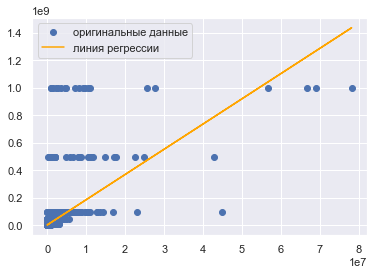

In [69]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, '#FFA500', label='линия регрессии')
plt.legend()
plt.show()

**Микровывод по задаче 9.2.:** График подтвердил мою идею о том, что строить линейную регрессию не было смысла. Нужно использовать машинное обучение.

**Задача 9.3:** Построить прогноз и узнать, какие характеристики приложения особенно важны.

In [70]:
import statsmodels.api as sm

In [71]:
GOOGLE.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,z-score
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,-0.118191
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,-0.117749
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,-0.070490
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,-0.000518
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,-0.117749


In [72]:
GOOGLE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  z-score         9659 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 1.4+ MB


Импорирую нужные для дальнейшей работы библиотеки.

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [74]:
# from xgboost import XGBRegressor - хотела импотрировать, не получилось, на просторах сети вычитала, что с ним тоже можно предсказания делать.

Чтобы улучшить производительность прогнозирования алгоритма ML, мы преобразуем столбец «Installs», чтобы сделать его более «нормальным». В частности, мы должны преобразовать его с помощью преобразования log(x+1), так как есть приложения с 0 установками. Более того, мы можем удалить "лишние" столбецы и оставить только сталбцы с переменными типа float64 (если оставить другой тип, то будет ошибка). Столбец 'z-score' я также удалю, т.к. его не было в первоначальном DataSet. Перменную 'Type' сделаем бинарной (заменяем 'Free' на 0, "Paid" на 1).

In [75]:
df1=GOOGLE.copy()
df1=GOOGLE.drop(['App','Last Updated','Android Ver','Current Ver','Content Rating'], axis=1)
df1['Installs']=np.log(GOOGLE['Installs'] + 1)
df1.drop('z-score', axis = 1, inplace=True)

df1.drop('Genres', axis = 1, inplace=True)
df1.drop('Category', axis = 1, inplace=True)

df1['Type'] = df1['Type'].replace({'Free':0, "Paid":1})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    8196 non-null   float64
 1   Reviews   9659 non-null   int64  
 2   Size      8432 non-null   float64
 3   Installs  9659 non-null   float64
 4   Type      9658 non-null   float64
 5   Price     9659 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 786.3 KB


Мы ясно видим преимущества логарифмического преобразования, теперь оно больше похоже на обычное распределение.

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    8196 non-null   float64
 1   Reviews   9659 non-null   int64  
 2   Size      8432 non-null   float64
 3   Installs  9659 non-null   float64
 4   Type      9658 non-null   float64
 5   Price     9659 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 786.3 KB


Теперь мы можем вычислить недостающие значения рейтинга и размера с помощью KNNImputer.

In [77]:
imputer = KNNImputer(n_neighbors=3)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

In [78]:
X=df1.drop('Rating', axis = 1).values

In [79]:
y=df1['Rating'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
scaler = MinMaxScaler()

In [82]:
scaler.fit(X_train)

MinMaxScaler()

In [83]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

**Random Forest** является композицией (ансамблем) множества решающих деревьев, что позволяет снизить проблему переобучения и повысить точность в сравнении с одним деревом. Прогноз получается в результате агрегирования ответов множества деревьев. Случайный лес — один из алгоритмов машинного обучения, придуманные Лео Брейманом и Адель Катлер ещё в прошлом веке. Подробнее: https://alexanderdyakonov.wordpress.com/2016/11/14/%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9-%D0%BB%D0%B5%D1%81-random-forest/

In [84]:
rf = RandomForestRegressor()

In [85]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [86]:
y_pred_rf = rf.predict(X_test)

Среднеквадратичная ошибка (Root Mean Square Error, RMS Error, **RMSE**) - расстояние между двумя точками.

In [87]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE using RF: ", np.sqrt(mse_rf))

RMSE using RF:  0.543206444384144


In [88]:
feature_name_list=df1.drop('Rating', axis = 1).columns

In [89]:
rf.feature_names = feature_name_list

Text(0.5, 0, 'Feature Importance (%)')

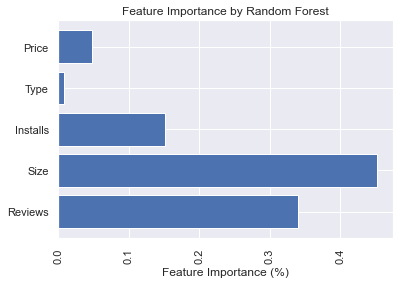

In [90]:
plt.barh(rf.feature_names,rf.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)')

**Микровывод по задаче 9.3.:** Что касается важности "переменных", мы видим, что RF придавал большее значение Reviews (отзывам) и Size (размеру).

Попробуем ещё раз построить регрессию, но уже с элементами машинного обучения.

In [91]:
#загрузим необходимые библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, classification_report, f1_score, accuracy_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
lm = LinearRegression()

In [92]:
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)


In [93]:
#протестируем и обучим модель 
print("Оценка X-train с Y-train составила : ", lm.score(X_train,y_train))
print("Оценка X-test  с Y-test  составила : ", lm.score(X_test,y_test))

Оценка X-train с Y-train составила :  0.011636126390047408
Оценка X-test  с Y-test  составила :  0.004144205694798786


In [94]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [95]:
print(lm.intercept_)

4.0520160263094995


In [96]:
#посмотрим, как работает наша модель
print("Оценка модели линейной регрессии: средняя абсолютная ошибка", mean_absolute_error(y_test,y_pred))
print("Оценка модели линейной регрессии: среднеквадратическая ошибка" , mean_squared_error(y_test,y_pred))
print("Оценка модели линейной регрессии: средняя абсолютная ошибка", median_absolute_error(y_test,y_pred)) 

Оценка модели линейной регрессии: средняя абсолютная ошибка 0.4015658120007082
Оценка модели линейной регрессии: среднеквадратическая ошибка 0.31066583226976513
Оценка модели линейной регрессии: средняя абсолютная ошибка 0.29725908632398346


**Микровывод:** Линейная регрессия бесполезна

___

### Выводы: ###
1. Бесплатных приложений больше, чем платных.
2. Пользователи предпочитают платить за легкие приложения. Таким образом, громоздкое платное приложение может плохо работать на рынке.
3. Большинство приложений с самым высоким рейтингом имеют оптимальный размер от ~ 1 МБ до ~ 40 МБ — они не слишком легкие и не слишком тяжелые.
4. Оптимальная цена большинства приложений с самым высоким рейтингом составляет ~ 1 до 30 — ни слишком дешево, ни слишком дорого.
5. Медицинские и семейные приложения являются самыми дорогими и даже стоят до 80 долларов.
6. Пользователи, как правило, загружают приложение чаще, если оно было проверено большим количеством людей. Просмотр приложения большим количеством людей может быть хорошей идеей для увеличения доли приложения на рынке!
7. Для Random Forest самыми важными переменными являются Reviews и Size.

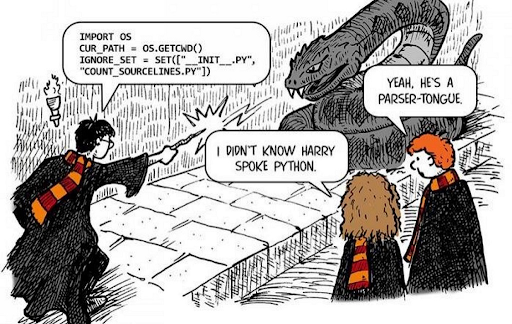